In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_data_dir=r'/Users/rahul/Downloads/brain_tumor_dataset/train'
valid_data_dir=r'/Users/rahul/Downloads/brain_tumor_dataset/test' 

In [3]:
train_datagen=ImageDataGenerator(rescale=1/255.0,
                                    rotation_range=30,
                                    zoom_range=0.4,
                                    horizontal_flip=True)
train_generator=train_datagen.flow_from_directory(train_data_dir,
                                                    batch_size=16,
                                                     class_mode='categorical',
                                                     target_size=(224,224))

classes_name=train_generator.class_indices.keys()
classes_name=list(classes_name)
classes_name

Found 227 images belonging to 2 classes.


['no', 'yes']

In [4]:
validation_datagen=ImageDataGenerator(rescale=1/255.0)
validation_generator=validation_datagen.flow_from_directory(valid_data_dir,
                                                               batch_size=16,
                                                               class_mode='categorical',
                                                               target_size=(224,224))

Found 26 images belonging to 2 classes.


In [5]:
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras import models,layers
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 173056)            0

In [6]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(train_generator,epochs=10,validation_data=validation_generator)

Epoch 1/10
15/15 [==============================] - 4s 227ms/step - loss: 1.1788 - accuracy: 0.6079 - val_loss: 0.6289 - val_accuracy: 0.6154
Epoch 2/10
15/15 [==============================] - 3s 212ms/step - loss: 0.6447 - accuracy: 0.6564 - val_loss: 0.6459 - val_accuracy: 0.5769
Epoch 3/10
15/15 [==============================] - 3s 213ms/step - loss: 0.6406 - accuracy: 0.6696 - val_loss: 0.6312 - val_accuracy: 0.5769
Epoch 4/10
15/15 [==============================] - 3s 213ms/step - loss: 0.6362 - accuracy: 0.6872 - val_loss: 0.5752 - val_accuracy: 0.8077
Epoch 5/10
15/15 [==============================] - 3s 232ms/step - loss: 0.6307 - accuracy: 0.6740 - val_loss: 0.7155 - val_accuracy: 0.5000
Epoch 6/10
15/15 [==============================] - 3s 215ms/step - loss: 0.6002 - accuracy: 0.7093 - val_loss: 0.6944 - val_accuracy: 0.5769
Epoch 7/10
15/15 [==============================] - 3s 213ms/step - loss: 0.5852 - accuracy: 0.7181 - val_loss: 0.6752 - val_accuracy: 0.5769
Epoch 

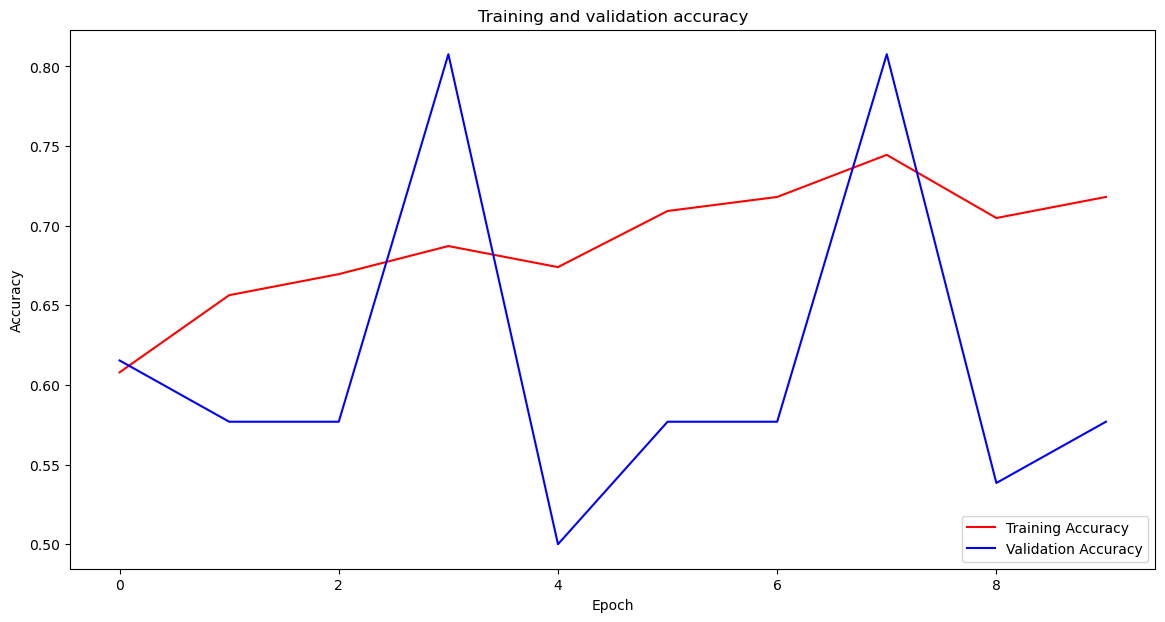

In [7]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc))
fig=plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'b',label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc='lower right')
plt.show()

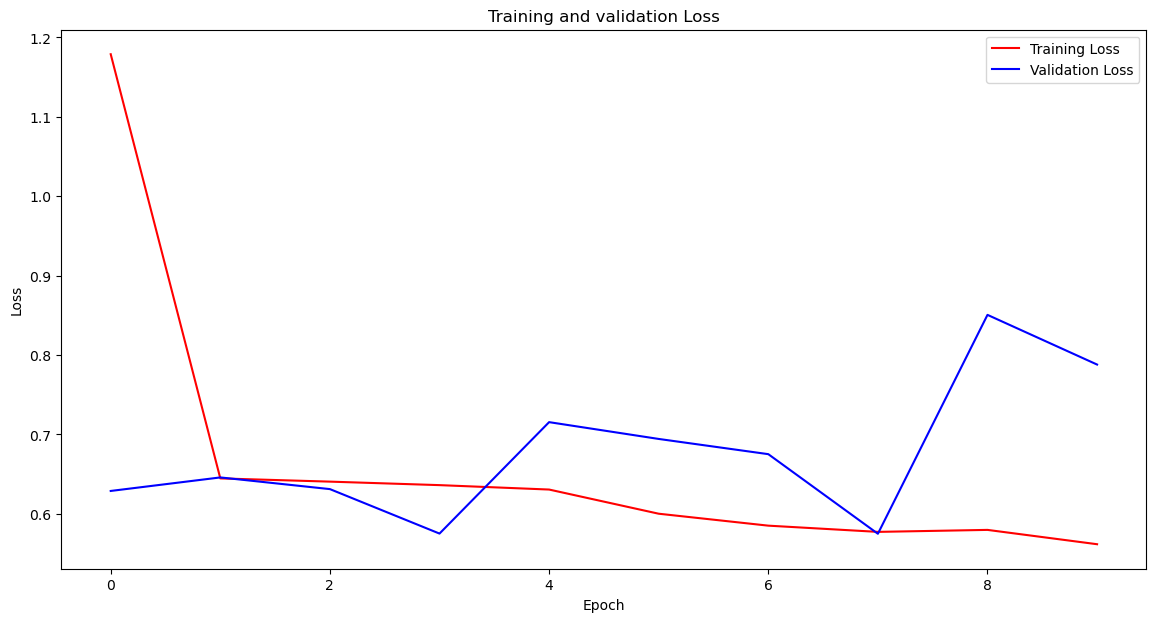

In [8]:
fig2=plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'b',label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and validation Loss')
plt.legend(loc='upper right')
plt.show()

(224, 224, 3)
1/1 [==============================] - 0s 21ms/step
no


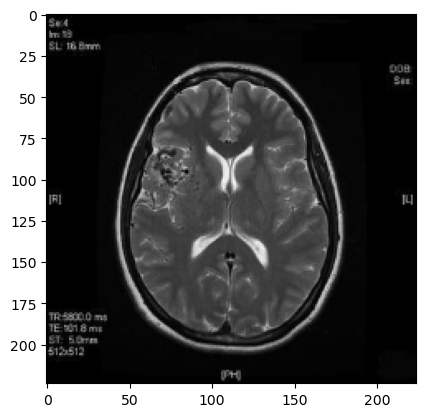

In [10]:
#predicting a single input image
import cv2
img=cv2.imread('/Users/rahul/Downloads/brain_tumor_dataset/test/no/No14.jpg')
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.resize(img,(224,224))
print(img.shape)
plt.imshow(img,cmap=plt.cm.binary)

prediction=model.predict(np.array([img])/255)
index=np.argmax(prediction)
print(classes_name[index])

In [12]:
(classes_name)

['no', 'yes']

In [ ]:
import joblib
joblib.dump(model,'/Users/rahul/Downloads/brain_tumor_dataset/brain_classification')